# Introduction
This file is to construct and train three machine learning models to classify the disaster tweets, such as XGBoost, SVM, Ransom Forest. Evaluate the performance with validation accuracy. Finally, get the prediction on test set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# 1. Load dataset

Upload the preprocessed data:
* data_e: preprocessed with TreebankWordTokenizer
* data_u: preprocessed with WordPunctTokenizer
* data_s: preprocessed with WhitespaceTokenizer


In [2]:
# Upload training set
df_train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
data_e = pd.read_csv('/kaggle/input/disaster-tweets-3-tokenizers-data-trainset/data_e.csv').iloc[:,1:]
data_u = pd.read_csv('/kaggle/input/disaster-tweets-3-tokenizers-data-trainset/data_u.csv').iloc[:,1:]
data_s = pd.read_csv('/kaggle/input/disaster-tweets-3-tokenizers-data-trainset/data_s.csv').iloc[:,1:]
print('Training set shape = {}'.format(df_train.shape))
print('Data_e shape = {}'.format(data_e.shape))
print('Data_u shape = {}'.format(data_u.shape))
print('Data_s shape = {}'.format(data_s.shape))

Training set shape = (7613, 5)
Data_e shape = (7613, 300)
Data_u shape = (7613, 300)
Data_s shape = (7613, 300)


In [3]:
data_e.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.264460,3.473010,0.761659,0.315691,0.662551,-1.912180,2.580655,4.118057,0.847140,-1.891551,...,3.153043,2.208856,0.243728,0.574112,2.463802,0.768590,0.674521,-1.420716,1.643735,-1.238555
1,0.454356,0.787967,0.138714,0.220362,0.347263,-0.696061,0.715638,1.655626,-0.384629,-0.721698,...,0.708280,0.178729,0.885802,0.738266,0.899161,0.205580,0.480304,0.126704,0.180366,0.216359
2,1.074851,5.292600,1.172777,0.371113,1.242576,-3.009737,3.641786,6.690299,0.907105,-3.002192,...,4.649509,3.128608,1.121437,1.034403,3.782247,1.570376,1.049793,-1.921467,2.092391,-1.225991
3,1.065566,0.773542,0.235014,0.290001,0.024616,-0.736450,0.586556,1.881241,-0.522909,-0.525850,...,0.599248,0.090778,1.347611,0.916898,0.504712,0.234964,0.506515,0.239537,0.102038,0.151526
4,0.647733,4.389930,0.953624,-0.117358,1.129375,-1.613834,2.861328,4.224875,0.716666,-2.607706,...,3.501758,2.284597,0.510159,1.202372,3.645951,1.903817,1.352194,-1.624802,1.419347,-0.541357


In [4]:
# Upload test set
df_test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
test_e = pd.read_csv('/kaggle/input/disaster-tweets-3-tokenizers-data-testset/test_e.csv').iloc[:,1:]
test_u = pd.read_csv('/kaggle/input/disaster-tweets-3-tokenizers-data-testset/test_u.csv').iloc[:,1:]
test_s = pd.read_csv('/kaggle/input/disaster-tweets-3-tokenizers-data-testset/test_s.csv').iloc[:,1:]
print('Test set shape = {}'.format(df_test.shape))
print('Test_e shape = {}'.format(test_e.shape))
print('Test_u shape = {}'.format(test_u.shape))
print('Test_s shape = {}'.format(test_s.shape))

Test set shape = (3263, 4)
Test_e shape = (3263, 300)
Test_u shape = (3263, 300)
Test_s shape = (3263, 300)


In [5]:
test_e.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.455360,1.044940,-0.143644,0.173743,0.817209,-1.277175,0.180766,2.494107,-0.062792,-0.942871,...,0.291104,1.723919,1.220648,0.806225,1.200969,1.679046,-0.290383,-0.292664,0.698769,-0.372825
1,0.552173,1.384795,-0.181273,0.248668,1.093150,-1.707483,0.241068,3.131648,-0.177715,-1.207477,...,0.412290,2.249743,1.602208,0.978127,1.681905,2.142224,-0.402567,-0.424773,0.888439,-0.539012
2,1.419791,3.321877,-0.339816,0.709381,2.346475,-4.144244,0.784629,7.569028,-0.525376,-2.808867,...,1.001628,5.405518,3.876095,2.219716,3.812833,5.163865,-0.740076,-0.906884,2.313758,-1.381910
3,0.073552,0.223336,-0.048306,0.006968,0.222985,-0.267433,-0.027384,0.494715,0.000084,-0.219715,...,0.075168,0.351434,0.238806,0.163392,0.302783,0.328907,-0.107120,-0.093252,0.092227,-0.074037
4,0.363019,0.864263,-0.171570,0.057936,0.824002,-1.103651,0.021395,2.169538,0.062125,-0.887464,...,0.285747,1.474492,1.016422,0.759059,1.107956,1.400724,-0.362764,-0.321442,0.509862,-0.270511


In [6]:
# get labels
labels = df_train['target'].tolist()
print('Labels shape = {}'.format(len(labels)))

Labels shape = 7613


### Split training set into training set and validation set

In [7]:
from sklearn.model_selection import train_test_split

def dataset_split(data, labels):
    # Split the data into train and test(valiation) sets
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

    print('Features of training set: shape = {}'.format(X_train.shape))
    print('Features of validation set: shape = {}'.format(X_test.shape))
    print('Labels of training set: shape = {}'.format(len(y_train)))
    print('Labels of validation set: shape = {}'.format(len(y_test)))
    
    return X_train, X_test, y_train, y_test

# 2 Machine learning models
Here apply three classic machine learning models to classify the disaster tweets.
* XGBoost
* SVM
* Random Forest

In [8]:
# Define the models
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier as RFC

11 0.7135214490385271


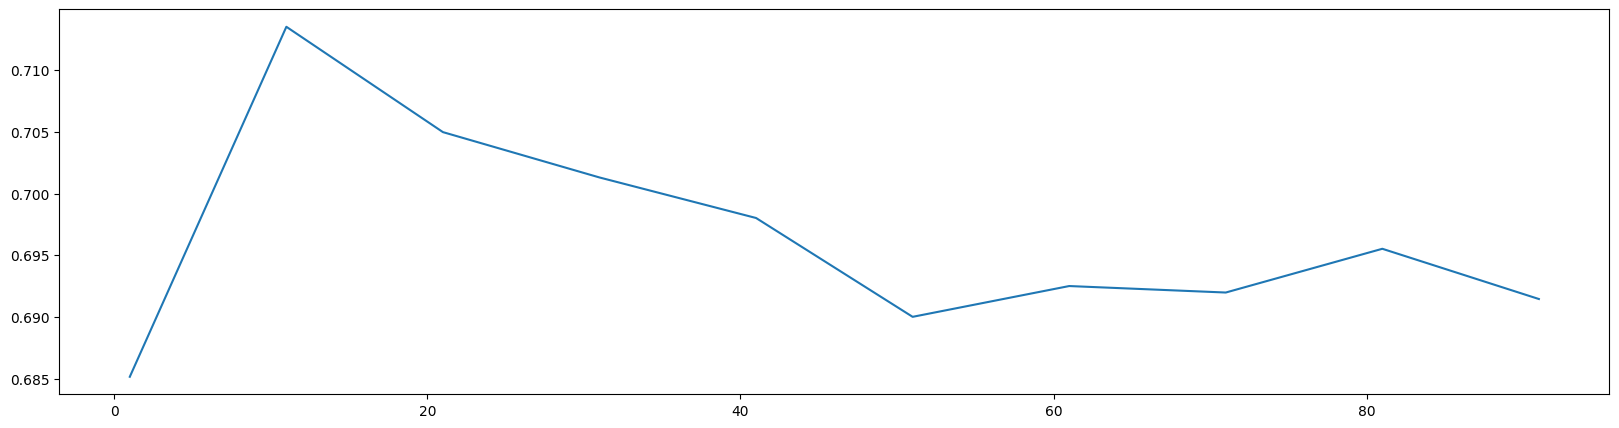

In [9]:
# Determine main hyperparameters for three models
from sklearn.model_selection import cross_val_score

axisx = range(1, 101, 10)
score1 = []
for i in axisx:
    reg = XGBClassifier(n_estimators=i, random_state=42)
    score = cross_val_score(reg,data_e,labels,cv=5).mean()
    score1.append(score)
    
print(axisx[score1.index(max(score1))],max(score1))
plt.figure(figsize=[20,5])
plt.plot(axisx,score1)
plt.savefig('XGB_LearningCurve.png')
plt.show()

0.7315142411193067 30.0


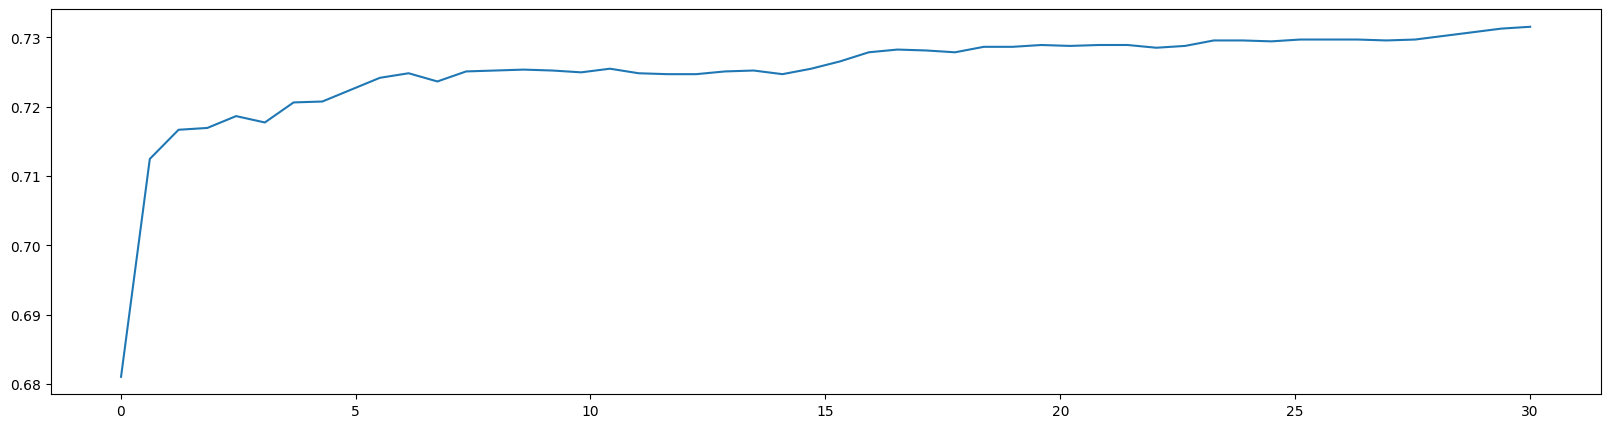

In [10]:
score2 = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    SVM = svm.SVC(C=i, random_state=42)
    score = cross_val_score(SVM,data_e,labels,cv=5).mean()
    score2.append(score)

print(max(score2), C_range[score2.index(max(score2))])
plt.figure(figsize=[20,5])
plt.plot(C_range,score2)
plt.savefig("SVM_LearningCurve.png")
plt.show()

0.7125985006078499 51


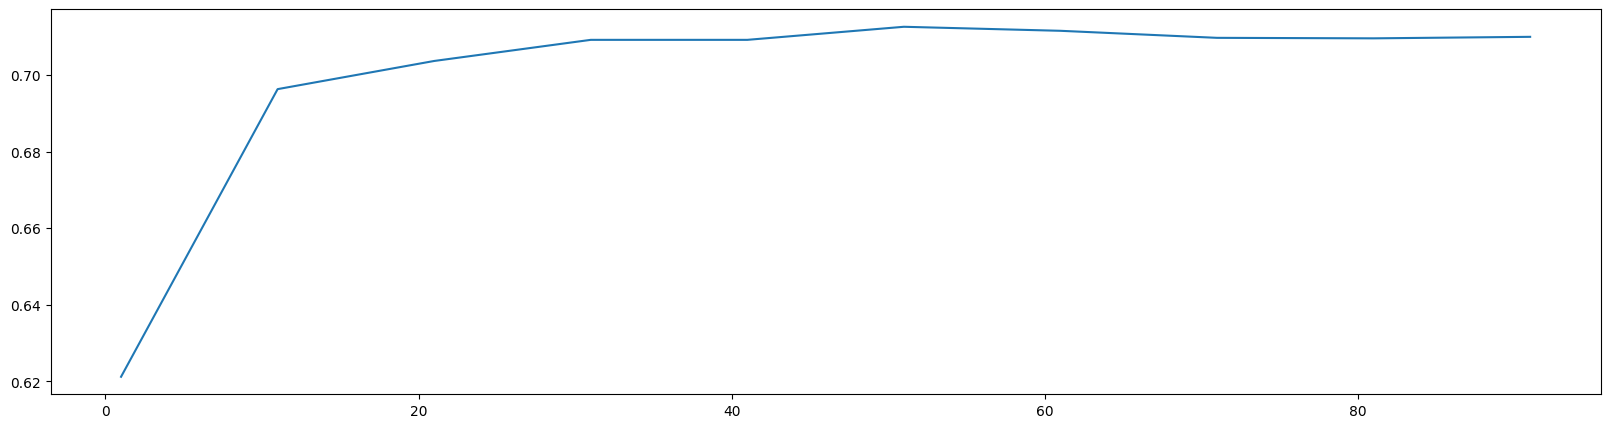

In [11]:
score3 = []
for i in range(0,100,10):
    rfc = RFC(n_estimators=i+1, random_state=42)
    score = cross_val_score(rfc,data_e,labels,cv=5).mean()
    score3.append(score)
    
print(max(score3),(score3.index(max(score3))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score3)
plt.savefig('RF_LearningCurve.png')
plt.show()

In [12]:
model_XGB = XGBClassifier(n_estimators=11, random_state=42)
model_SVM = svm.SVC(C=30, random_state=42)
model_RF = RFC(n_estimators=50, random_state=42)

In [13]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

def model_training(models, datas, model_name, data_name, save=False):
    X_train, X_test, y_train, y_test = dataset_split(datas[data_name], labels)
    model = models[model_name]
    model.fit(X_train, y_train)
    if model_name != 'SVM':
        y_prob = model.predict_proba(X_test)[:,1]  # Take the probability that prediction is class 1
    else:
        y_prob = model.predict(X_test)
    y_pred = np.where(y_prob > 0.5, 1, 0)
    
    auc_roc = roc_auc_score(y_test, y_prob)
    target_names = ['No Disaster', 'Disaster']
    classreport = classification_report(y_test, y_pred, target_names=target_names)
    print(classification_report)
    print("Model: {}, Data: {}, AUC = {}".format(model_name, data_name, auc_roc))
    
    if save == True:
        pd.DataFrame(classreport).to_csv("{}_{}_classreport.csv".format(model_name, data_name))
    
    return model, classreport

In [14]:
def get_prediction(model, testset, model_name, data_name, save=False):
    y_prob = model.predict(testset[data_name])
    y_pred = np.where(y_prob > 0.5, 1, 0)
    print(y_pred.shape)
    
    if save == True:
        pd.DataFrame(y_pred).to_csv("{}_{}_prediction.csv".format(model_name, data_name))
    
    return y_pred

# 3 Predictions

In [15]:
models = {
    'XGBoost': model_XGB,
    'SVM': model_SVM,
    'Random Forest': model_RF
}

datas = {
    'penn_tokens': data_e,
    'punct_tokens': data_u,
    'space_tokens': data_s
}

testsets = {
    'penn_tokens': test_e,
    'punct_tokens': test_u,
    'space_tokens': test_s
}

model_name = models.keys()
data_name = datas.keys()
testset_name = testsets.keys()

## 3.1 SVM

In [16]:
modelname = 'SVM'
tokenname = 'penn_tokens'

model, classreport = model_training(models, datas, modelname, tokenname, save=False)
print(classreport)
print(model)
y_pred = get_prediction(model, testsets, modelname, tokenname, save=True)

Features of training set: shape = (6090, 300)
Features of validation set: shape = (1523, 300)
Labels of training set: shape = 6090
Labels of validation set: shape = 1523
<function classification_report at 0x7ea985bf5900>
Model: SVM, Data: penn_tokens, AUC = 0.7361219337618515
              precision    recall  f1-score   support

 No Disaster       0.74      0.89      0.81       874
    Disaster       0.79      0.59      0.67       649

    accuracy                           0.76      1523
   macro avg       0.77      0.74      0.74      1523
weighted avg       0.76      0.76      0.75      1523

SVC(C=30, random_state=42)
(3263,)


In [17]:
modelname = 'SVM'
tokenname = 'punct_tokens'

model, classreport = model_training(models, datas, modelname, tokenname, save=False)
print(classreport)
print(model)
y_pred = get_prediction(model, testsets, modelname, tokenname, save=True)

Features of training set: shape = (6090, 300)
Features of validation set: shape = (1523, 300)
Labels of training set: shape = 6090
Labels of validation set: shape = 1523
<function classification_report at 0x7ea985bf5900>
Model: SVM, Data: punct_tokens, AUC = 0.7361448523163607
              precision    recall  f1-score   support

 No Disaster       0.74      0.88      0.81       874
    Disaster       0.79      0.59      0.67       649

    accuracy                           0.76      1523
   macro avg       0.77      0.74      0.74      1523
weighted avg       0.76      0.76      0.75      1523

SVC(C=30, random_state=42)
(3263,)


In [18]:
modelname = 'SVM'
tokenname = 'space_tokens'

model, classreport = model_training(models, datas, modelname, tokenname, save=False)
print(classreport)
print(model)
y_pred = get_prediction(model, testsets, modelname, tokenname, save=True)

Features of training set: shape = (6090, 300)
Features of validation set: shape = (1523, 300)
Labels of training set: shape = 6090
Labels of validation set: shape = 1523
<function classification_report at 0x7ea985bf5900>
Model: SVM, Data: space_tokens, AUC = 0.7233298544142899
              precision    recall  f1-score   support

 No Disaster       0.73      0.90      0.81       874
    Disaster       0.81      0.54      0.65       649

    accuracy                           0.75      1523
   macro avg       0.77      0.72      0.73      1523
weighted avg       0.76      0.75      0.74      1523

SVC(C=30, random_state=42)
(3263,)


## 3.2 XGBoost

In [19]:
modelname = 'XGBoost'
tokenname = 'penn_tokens'

model, classreport = model_training(models, datas, modelname, tokenname, save=False)
print(classreport)
print(model)
y_pred = get_prediction(model, testsets, modelname, tokenname, save=True)

Features of training set: shape = (6090, 300)
Features of validation set: shape = (1523, 300)
Labels of training set: shape = 6090
Labels of validation set: shape = 1523
<function classification_report at 0x7ea985bf5900>
Model: XGBoost, Data: penn_tokens, AUC = 0.7837352307545846
              precision    recall  f1-score   support

 No Disaster       0.74      0.86      0.80       874
    Disaster       0.76      0.60      0.67       649

    accuracy                           0.75      1523
   macro avg       0.75      0.73      0.73      1523
weighted avg       0.75      0.75      0.74      1523

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lear

In [20]:
modelname = 'XGBoost'
tokenname = 'punct_tokens'

model, classreport = model_training(models, datas, modelname, tokenname, save=False)
print(classreport)
print(model)
y_pred = get_prediction(model, testsets, modelname, tokenname, save=True)

Features of training set: shape = (6090, 300)
Features of validation set: shape = (1523, 300)
Labels of training set: shape = 6090
Labels of validation set: shape = 1523
<function classification_report at 0x7ea985bf5900>
Model: XGBoost, Data: punct_tokens, AUC = 0.7954818714233833
              precision    recall  f1-score   support

 No Disaster       0.74      0.83      0.78       874
    Disaster       0.72      0.61      0.66       649

    accuracy                           0.74      1523
   macro avg       0.73      0.72      0.72      1523
weighted avg       0.73      0.74      0.73      1523

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lea

In [21]:
modelname = 'XGBoost'
tokenname = 'space_tokens'

model, classreport = model_training(models, datas, modelname, tokenname, save=False)
print(classreport)
print(model)
y_pred = get_prediction(model, testsets, modelname, tokenname, save=True)

Features of training set: shape = (6090, 300)
Features of validation set: shape = (1523, 300)
Labels of training set: shape = 6090
Labels of validation set: shape = 1523
<function classification_report at 0x7ea985bf5900>
Model: XGBoost, Data: space_tokens, AUC = 0.7745616385708695
              precision    recall  f1-score   support

 No Disaster       0.73      0.84      0.79       874
    Disaster       0.74      0.59      0.65       649

    accuracy                           0.74      1523
   macro avg       0.74      0.72      0.72      1523
weighted avg       0.74      0.74      0.73      1523

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lea

## 3.3 Random Forest

In [22]:
modelname = 'Random Forest'
tokenname = 'penn_tokens'

model, classreport = model_training(models, datas, modelname, tokenname, save=False)
print(classreport)
print(model)
y_pred = get_prediction(model, testsets, modelname, tokenname, save=True)

Features of training set: shape = (6090, 300)
Features of validation set: shape = (1523, 300)
Labels of training set: shape = 6090
Labels of validation set: shape = 1523
<function classification_report at 0x7ea985bf5900>
Model: Random Forest, Data: penn_tokens, AUC = 0.7893361728834715
              precision    recall  f1-score   support

 No Disaster       0.75      0.84      0.79       874
    Disaster       0.75      0.62      0.68       649

    accuracy                           0.75      1523
   macro avg       0.75      0.73      0.74      1523
weighted avg       0.75      0.75      0.74      1523

RandomForestClassifier(n_estimators=50, random_state=42)
(3263,)


In [23]:
modelname = 'Random Forest'
tokenname = 'punct_tokens'

model, classreport = model_training(models, datas, modelname, tokenname, save=False)
print(classreport)
print(model)
y_pred = get_prediction(model, testsets, modelname, tokenname, save=True)

Features of training set: shape = (6090, 300)
Features of validation set: shape = (1523, 300)
Labels of training set: shape = 6090
Labels of validation set: shape = 1523
<function classification_report at 0x7ea985bf5900>
Model: Random Forest, Data: punct_tokens, AUC = 0.7798646394911375
              precision    recall  f1-score   support

 No Disaster       0.75      0.83      0.79       874
    Disaster       0.73      0.62      0.67       649

    accuracy                           0.74      1523
   macro avg       0.74      0.73      0.73      1523
weighted avg       0.74      0.74      0.74      1523

RandomForestClassifier(n_estimators=50, random_state=42)
(3263,)


In [24]:
modelname = 'Random Forest'
tokenname = 'space_tokens'

model, classreport = model_training(models, datas, modelname, tokenname, save=False)
print(classreport)
print(model)
y_pred = get_prediction(model, testsets, modelname, tokenname, save=True)

Features of training set: shape = (6090, 300)
Features of validation set: shape = (1523, 300)
Labels of training set: shape = 6090
Labels of validation set: shape = 1523
<function classification_report at 0x7ea985bf5900>
Model: Random Forest, Data: space_tokens, AUC = 0.7663444552964779
              precision    recall  f1-score   support

 No Disaster       0.73      0.84      0.78       874
    Disaster       0.73      0.58      0.65       649

    accuracy                           0.73      1523
   macro avg       0.73      0.71      0.71      1523
weighted avg       0.73      0.73      0.72      1523

RandomForestClassifier(n_estimators=50, random_state=42)
(3263,)
